<a href="https://colab.research.google.com/github/g5briel/DataPUCPR1/blob/main/Exercise_L04_Visualisation_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%%capture
pip install uci-dataset

In [23]:

pip install ucimlrepo

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


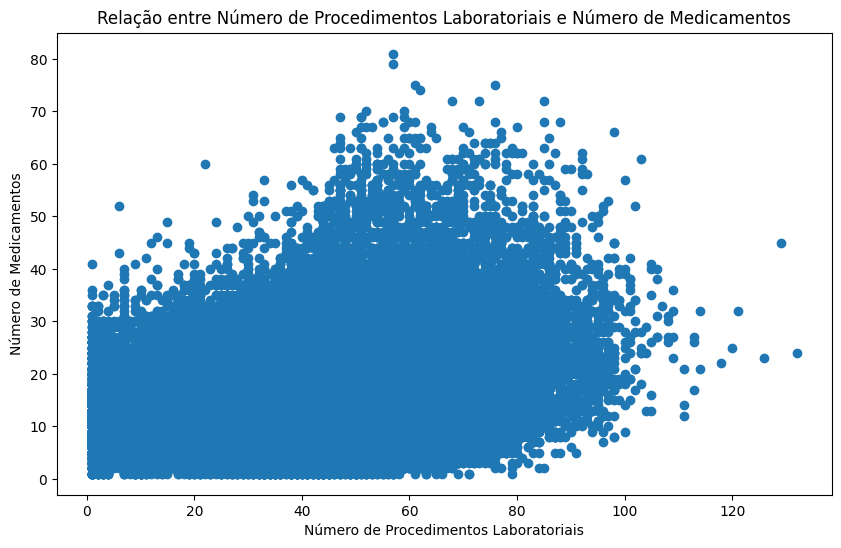

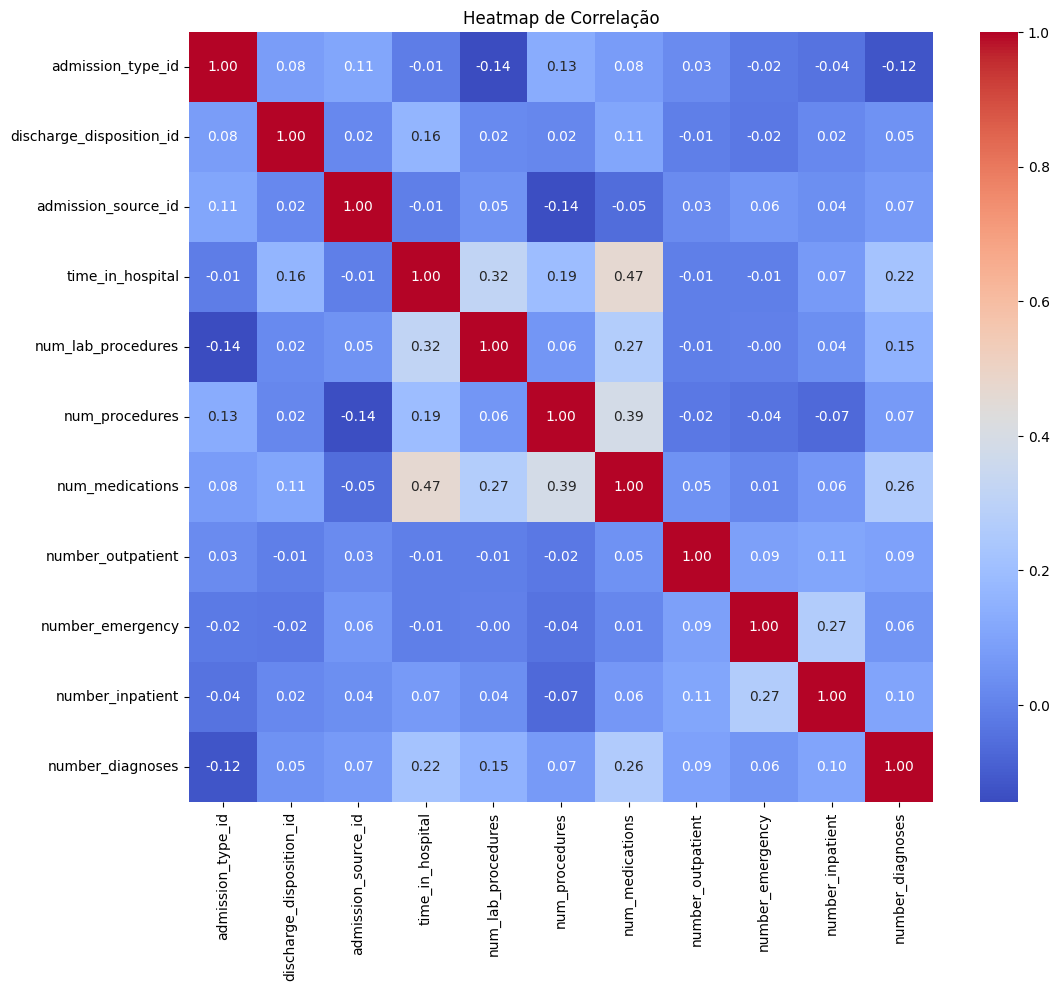

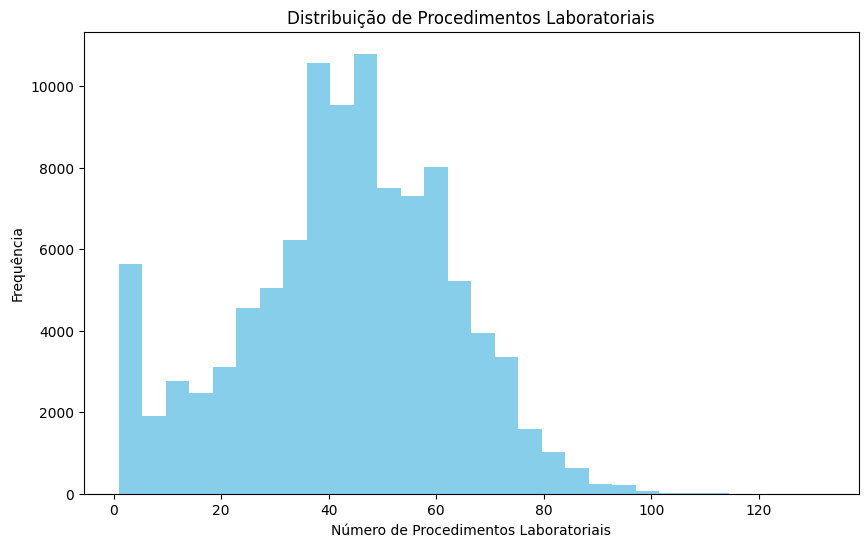

In [24]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# Data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# Scatterplot (exemplo: escolhendo duas variáveis numéricas, 'num_lab_procedures' e 'num_medications')
plt.figure(figsize=(10, 6))
plt.scatter(X['num_lab_procedures'], X['num_medications'])  # Substitua pelas colunas correspondentes, se necessário
plt.title('Relação entre Número de Procedimentos Laboratoriais e Número de Medicamentos')
plt.xlabel('Número de Procedimentos Laboratoriais')
plt.ylabel('Número de Medicamentos')
plt.show()

# Heatmap (correlações entre variáveis numéricas)
# Nota: Pode ser necessário filtrar X para incluir apenas variáveis numéricas
num_X = X.select_dtypes(include=['number'])  # Seleciona apenas dados numéricos
plt.figure(figsize=(12, 10))
sns.heatmap(num_X.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap de Correlação')
plt.show()

# Histograma (para uma variável numérica, por exemplo, 'num_lab_procedures')
plt.figure(figsize=(10, 6))
plt.hist(X['num_lab_procedures'], bins=30, color='skyblue')
plt.title('Distribuição de Procedimentos Laboratoriais')
plt.xlabel('Número de Procedimentos Laboratoriais')
plt.ylabel('Frequência')
plt.show()


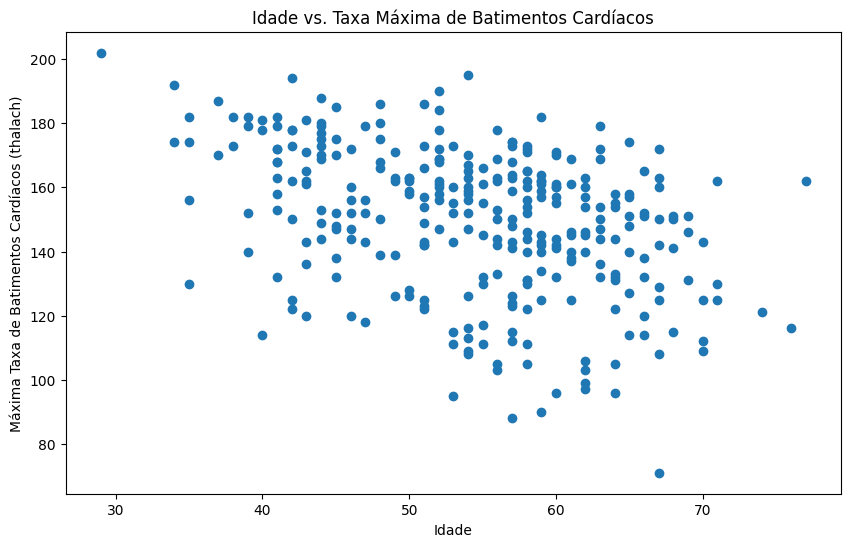

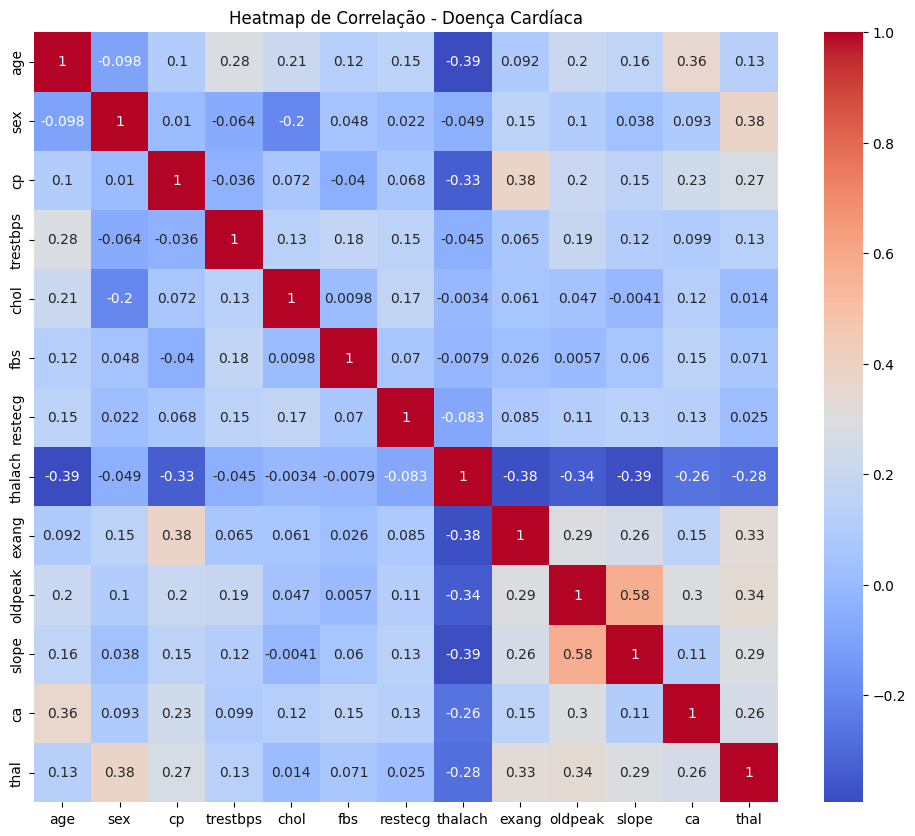

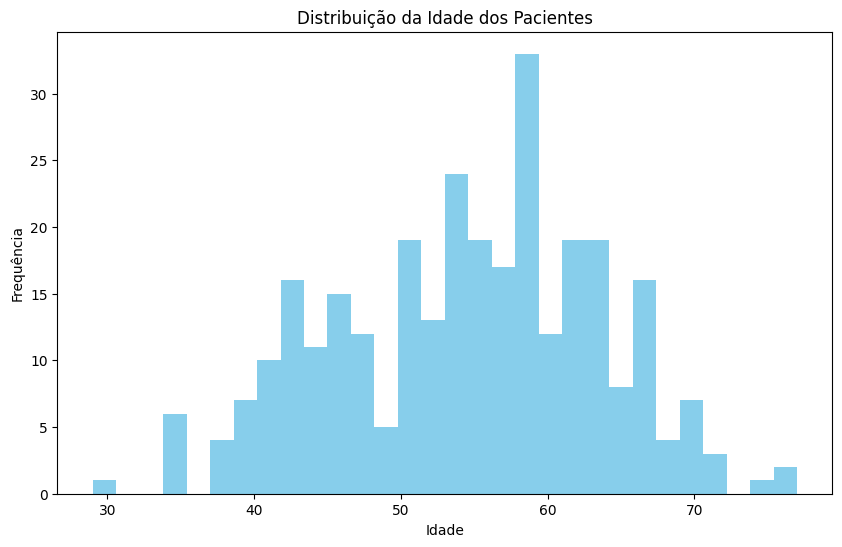

In [25]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Scatterplot (exemplo: 'age' vs 'max_heart_rate')
plt.figure(figsize=(10, 6))
plt.scatter(X['age'], X['thalach'])  # Substitua 'age' e 'thalach' conforme adequado às colunas reais
plt.title('Idade vs. Taxa Máxima de Batimentos Cardíacos')
plt.xlabel('Idade')
plt.ylabel('Máxima Taxa de Batimentos Cardíacos (thalach)')
plt.show()

# Heatmap (correlações entre variáveis numéricas)
num_X = X.select_dtypes(include=['number'])  # Seleciona apenas dados numéricos
plt.figure(figsize=(12, 10))
sns.heatmap(num_X.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de Correlação - Doença Cardíaca')
plt.show()

# Histograma (para uma variável numérica, exemplo: 'age')
plt.figure(figsize=(10, 6))
plt.hist(X['age'], bins=30, color='skyblue')
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


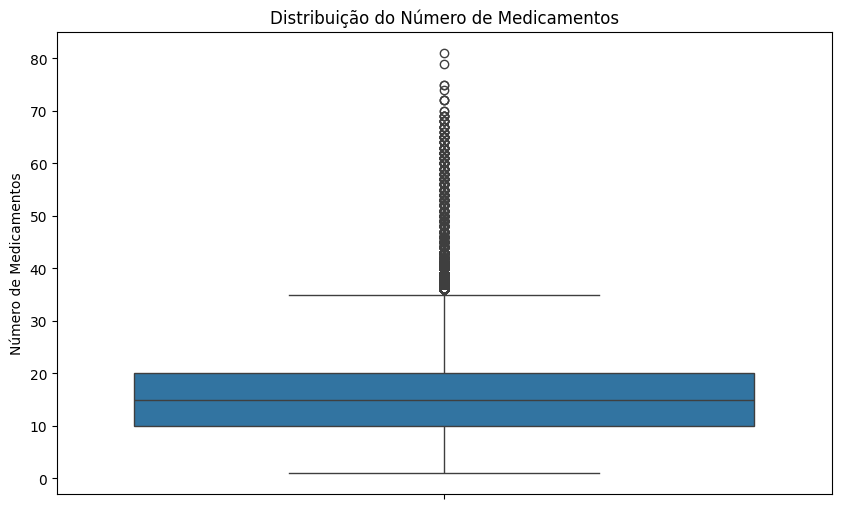

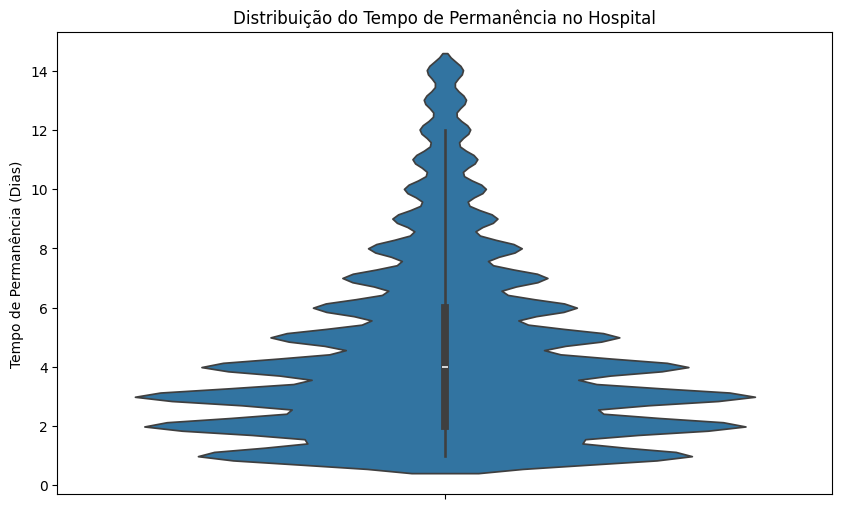

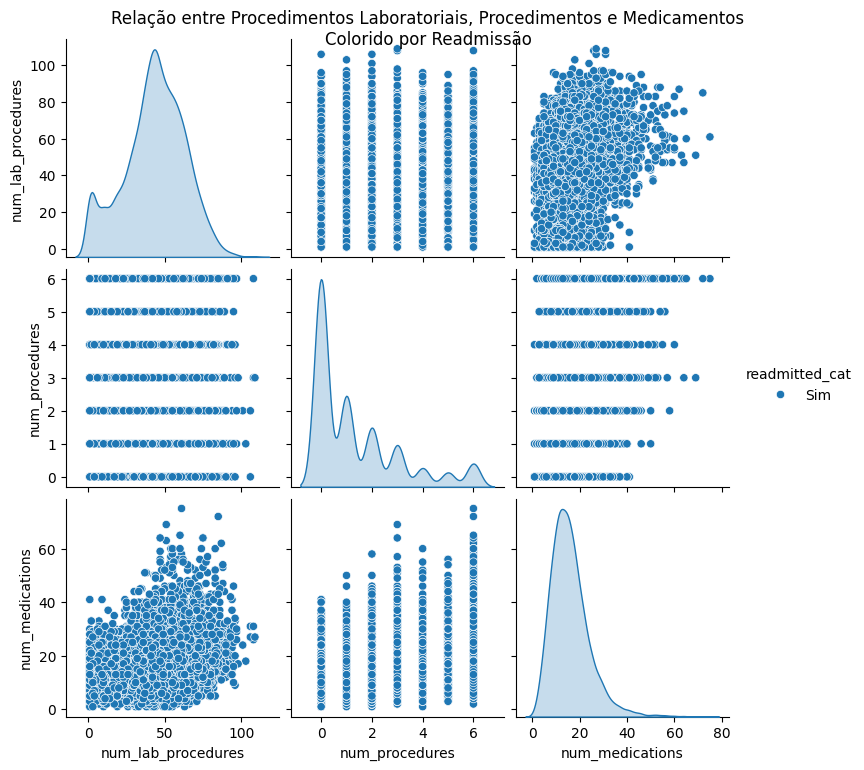

In [30]:
#b) Test the from Data to Viz to numeric data. Present 3 examples of visualization and comments the results.

from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# Data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# 1. Boxplot - Distribuição de 'num_medications'
plt.figure(figsize=(10, 6))
sns.boxplot(y=X['num_medications'])
plt.title('Distribuição do Número de Medicamentos')
plt.ylabel('Número de Medicamentos')
plt.show()

# 2. Violin Plot - Distribuição de 'time_in_hospital'
plt.figure(figsize=(10, 6))
sns.violinplot(y=X['time_in_hospital'])
plt.title('Distribuição do Tempo de Permanência no Hospital')
plt.ylabel('Tempo de Permanência (Dias)')
plt.show()

# 3. Pairplot - Relação entre 'num_lab_procedures', 'num_procedures' e 'num_medications', colorido por 'readmitted'
# Selecionando um subset do DataFrame para melhorar a performance do pairplot
subset_X = X[['num_lab_procedures', 'num_procedures', 'num_medications']].sample(frac=0.1, random_state=1)
subset_y = y.loc[subset_X.index]

# Convertendo 'readmitted' para uma variável categórica para visualização
subset_y['readmitted_cat'] = subset_y['readmitted'].apply(lambda x: 'Sim' if x else 'Não')

# Criando o pairplot
sns.pairplot(data=pd.concat([subset_X, subset_y['readmitted_cat']], axis=1), hue='readmitted_cat')
plt.suptitle('Relação entre Procedimentos Laboratoriais, Procedimentos e Medicamentos\nColorido por Readmissão', y=1.02)
plt.show()


In [32]:
import folium

# Coordenadas de Curitiba
latitude = -25.4295963
longitude = -49.2712724

# Criar mapa de Curitiba e exibi-lo
curitiba_map = folium.Map(location=[latitude, longitude], zoom_start=14)

# Marcadores para locais específicos
# Coordenadas do Passeio Público
folium.Marker([-25.4195, -49.2654], popup='Passeio Público', icon=folium.Icon(color='green')).add_to(curitiba_map)

# Coordenadas do Mercado Municipal
folium.Marker([-25.4398, -49.2615], popup='Mercado Municipal', icon=folium.Icon(color='red')).add_to(curitiba_map)

# Coordenadas da UTFPR - Campus Curitiba
folium.Marker([-25.4342, -49.2730], popup='UTFPR Centro', icon=folium.Icon(color='blue')).add_to(curitiba_map)

# Exibir o mapa
curitiba_map


In [34]:
#d) Apply the NetworkX to analyse a social network, transportation planning, or other application with focus in graph visualization.
!pip install networkx

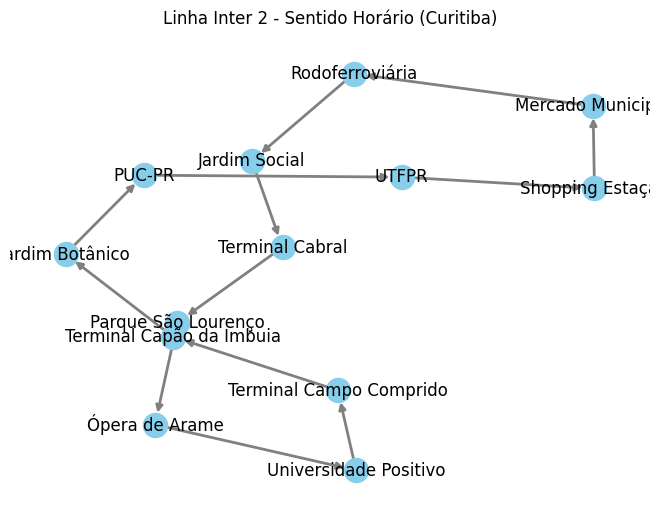

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar um grafo direcionado para representar a direção do trajeto
G = nx.DiGraph()

# Lista hipotética de paradas da linha Inter 2 no sentido horário
paradas_inter_2 = [
    "Terminal Capão da Imbuia", "Jardim Botânico", "PUC-PR", "UTFPR",
    "Shopping Estação", "Mercado Municipal", "Rodoferroviária", "Jardim Social",
    "Terminal Cabral", "Parque São Lourenço", "Ópera de Arame", "Universidade Positivo",
    "Terminal Campo Comprido"
]

# Adicionar as paradas como nós no grafo
for parada in paradas_inter_2:
    G.add_node(parada)

# Conectar cada parada com a próxima para representar a rota
for i in range(len(paradas_inter_2)-1):
    G.add_edge(paradas_inter_2[i], paradas_inter_2[i+1])

# Para fechar o loop no gráfico, assumindo que a linha retorna ao ponto inicial
# Remova esta linha se a linha Inter 2 não fizer um ciclo completo
G.add_edge(paradas_inter_2[-1], paradas_inter_2[0])

# Visualizar o grafo
pos = nx.spring_layout(G)  # Isso posiciona os nós de forma que seja minimizada a sobreposição
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', width=2, arrows=True)

plt.title("Linha Inter 2 - Sentido Horário (Curitiba)")
plt.axis('off')  # Remove os eixos para uma visualização mais limpa
plt.show()
